**Assignment 2 IVA**

21MIA1066

VISHALI SHARMA

Lab Task 1:

Setup and Basic Extraction

Objective:

Install the necessary tools and libraries, and extract frame information from a video.

Steps:

1.Install ffmpeg and ffmpeg-python:
oInstall the ffmpeg tool and the ffmpeg-python library.

2.Extract Frame Information:
oExtract frame information from a sample video.

In [ ]:
!pip install ffmpeg-python

In [ ]:
import os
import shutil

In [ ]:
import ffmpeg

def extract_frame_info(video_path):
    try:
        # Probe the video file to get information
        probe = ffmpeg.probe(video_path)
    except ffmpeg.Error as e:
        print(f"An error occurred while probing the video file: {e.stderr.decode('utf-8')}")
        return

    video_stream = next((stream for stream in probe['streams'] if stream['codec_type'] == 'video'), None)

    if video_stream is None:
        print('No video stream found in the file.')
        return

    # Extract frame information
    width = int(video_stream['width'])
    height = int(video_stream['height'])
    frame_rate = eval(video_stream['r_frame_rate'])
    total_frames = int(video_stream['nb_frames'])
    duration = float(video_stream['duration'])

    print(f'Video: {video_path}')
    print(f'Width: {width}')
    print(f'Height: {height}')
    print(f'Frame Rate: {frame_rate}')
    print(f'Total Frames: {total_frames}')
    print(f'Duration: {duration} seconds')

# Replace 'video.mp4' with the path to your video file
video_path = "/content/video.mp4"
extract_frame_info(video_path)


Video: /content/video.mp4
Width: 848
Height: 480
Frame Rate: 31.57894736842105
Total Frames: 396
Duration: 13.205 seconds


Lab Task 2: Frame Type Analysis

Objective:

Analyze the extracted frame information to understand the distribution of I, P, and B frames in a video.

Steps:

1.Modify the Script:
oCount the number of I, P, and B frames.
oCalculate the percentage of each frame type in the video.

2.Analyze Frame Distribution:
oPlot the distribution of frame types using a library like matplotlib.
oPlot a pie chart or bar graph showing the distribution of frame types using matplotlib.

I-Frames: 14 (3.54%)
P-Frames: 382 (96.46%)
B-Frames: 0 (0.00%)


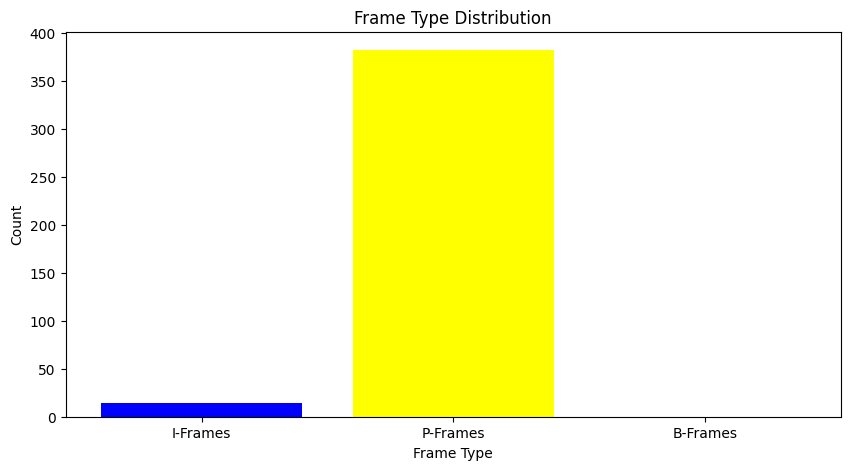

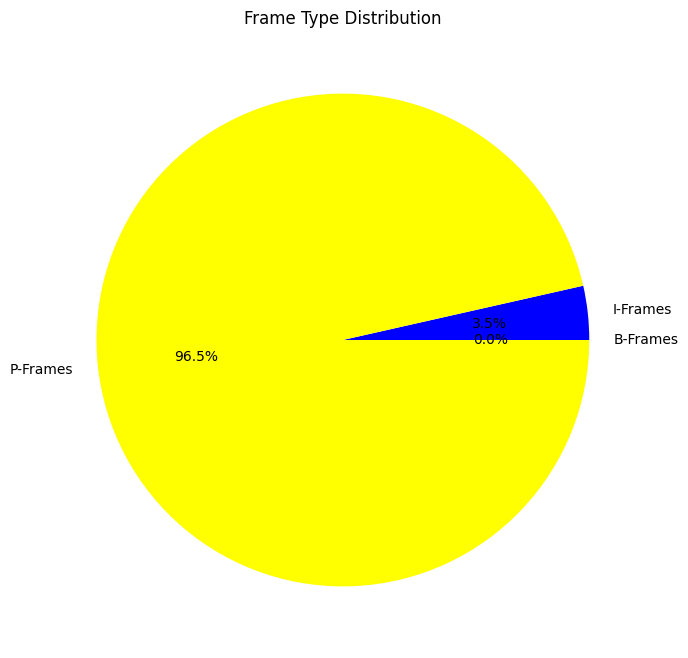

In [ ]:
import ffmpeg
import matplotlib.pyplot as plt

def count_frame_types(video_path):
    # Use ffmpeg to count I, P, and B frames
    result = ffmpeg.probe(video_path, select_streams='v', show_frames=None, show_entries='frame=pict_type')
    frames = result['frames']
    # Count the number of I, P, B frames
    frame_types = {'I': 0, 'P': 0, 'B': 0}
    for frame in frames:
        frame_type = frame['pict_type']
        frame_types[frame_type] += 1
    total_frames = sum(frame_types.values())
    percentages = {frame_type: (count / total_frames) * 100 for frame_type, count in frame_types.items()}
    print(f"I-Frames: {frame_types['I']} ({percentages['I']:.2f}%)")
    print(f"P-Frames: {frame_types['P']} ({percentages['P']:.2f}%)")
    print(f"B-Frames: {frame_types['B']} ({percentages['B']:.2f}%)")
    return frame_types, percentages
def plot_frame_distribution(frame_types, percentages):
    labels = ['I-Frames', 'P-Frames', 'B-Frames']
    counts = [frame_types['I'], frame_types['P'], frame_types['B']]
    percent_values = [percentages['I'], percentages['P'], percentages['B']]
    # Bar Plot
    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color=['blue', 'yellow', 'red'])
    plt.xlabel('Frame Type')
    plt.ylabel('Count')
    plt.title('Frame Type Distribution')
    plt.show()

    # Pie Chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['blue', 'yellow', 'red'])
    plt.title('Frame Type Distribution')
    plt.show()
video_path = '/content/video.mp4'
# Count frame types and calculate percentages
frame_types, percentages = count_frame_types(video_path)
# Plot the distribution of frame types
plot_frame_distribution(frame_types, percentages)

Lab Task 3: Visualizing Frames

Objective:

Extract actual frames from the video and display them using Python.
Steps:

1.Extract Frames:
oUse ffmpeg to extract individual I, P, and B frames from the video.
oSave these frames as image files.

2.Display Frames:
oUse a library like PIL (Pillow) or opencv-python to display the extracted frames.

Tasks:

1.Save I, P, and B frames as separate image files using ffmpeg.

2.Use PIL or opencv-python to load and display these frames in a Python script.
3.Compare the visual quality of I, P, and B frames.

In [10]:
!pip install opencv-python pillow


In [13]:
import os

# Create directories to save the frames
os.makedirs('I_frames', exist_ok=True)
os.makedirs('P_frames', exist_ok=True)
os.makedirs('B_frames', exist_ok=True)

# Extract I frames
!ffmpeg -i "{video_path}" -vf "select='eq(pict_type\,I)'" -vsync vfr I_frames/frame_%04d.png

# Extract P frames
!ffmpeg -i "{video_path}" -vf "select='eq(pict_type\,P)'" -vsync vfr P_frames/frame_%04d.png

# Extract B frames
!ffmpeg -i "{video_path}" -vf "select='eq(pict_type\,B)'" -vsync vfr B_frames/frame_%04d.png


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

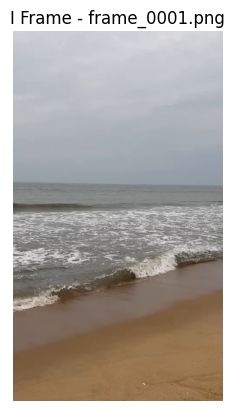

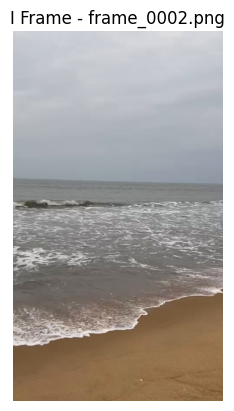

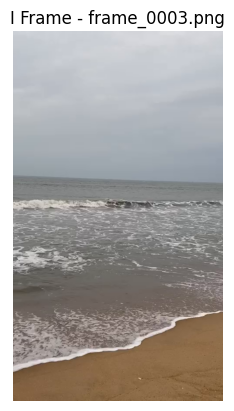

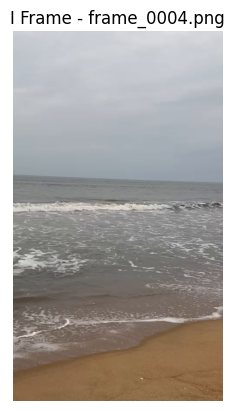

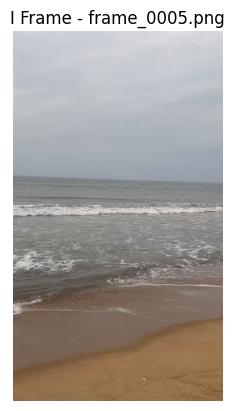

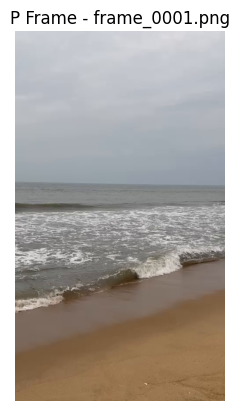

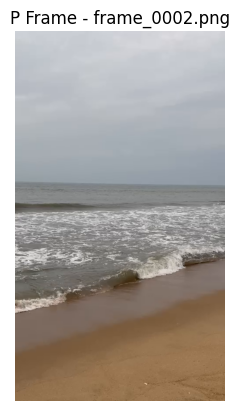

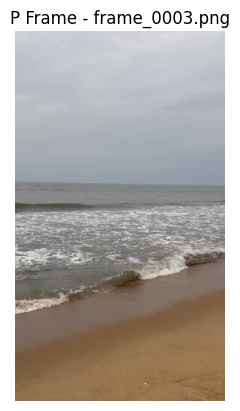

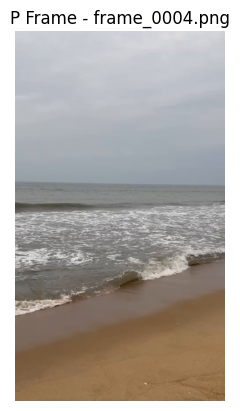

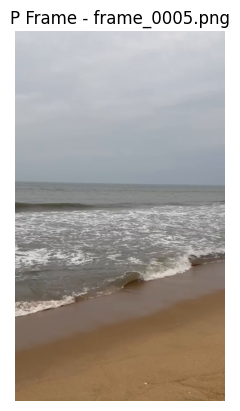

In [14]:
import cv2
from matplotlib import pyplot as plt

def display_frames(frame_folder, title):
    images = sorted(os.listdir(frame_folder))
    for image in images[:5]:  # Display the first 5 frames as an example
        img = cv2.imread(os.path.join(frame_folder, image))
        if img is None:
            print(f"Error reading image {image}")
            continue
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(f'{title} - {image}')
        plt.axis('off')
        plt.show()

# Display I frames
display_frames('I_frames', 'I Frame')

# Display P frames
display_frames('P_frames', 'P Frame')

# Display B frames
display_frames('B_frames', 'B Frame')

In [15]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import cv2

def compare_frames(frame1_path, frame2_path):
    frame1 = cv2.imread(frame1_path)
    frame2 = cv2.imread(frame2_path)

    if frame1 is None:
        raise ValueError(f"Error reading frame1: {frame1_path}")
    if frame2 is None:
        raise ValueError(f"Error reading frame2: {frame2_path}")

    # Resize frames if they are too small
    min_size = 7  # Minimum size for SSIM window
    if frame1.shape[0] < min_size or frame1.shape[1] < min_size:
        frame1 = cv2.resize(frame1, (min_size, min_size))
    if frame2.shape[0] < min_size or frame2.shape[1] < min_size:
        frame2 = cv2.resize(frame2, (min_size, min_size))

    psnr_value = psnr(frame1, frame2)
    ssim_value, _ = ssim(frame1, frame2, full=True, multichannel=True, win_size=3)  # Use a smaller window size
    return psnr_value, ssim_value

# Example comparison between an I frame and a P frame
i_frame_path = 'I_frames/frame_0001.png'  # Update with actual file paths
p_frame_path = 'P_frames/frame_0001.png'

# Check if the files exist
if not os.path.exists(i_frame_path):
    print(f"File does not exist: {i_frame_path}")
if not os.path.exists(p_frame_path):
    print(f"File does not exist: {p_frame_path}")

# Perform the comparison if the files exist
if os.path.exists(i_frame_path) and os.path.exists(p_frame_path):
    psnr_value, ssim_value = compare_frames(i_frame_path, p_frame_path)
    print(f'PSNR: {psnr_value}, SSIM: {ssim_value}')

PSNR: 30.92821763838218, SSIM: 0.9557966972961764


Lab Task 4: Frame Compression Analysis

Objective:
Analyze the compression efficiency of I, P, and B frames.

Steps:

1.Calculate Frame Sizes:
oCalculate the file sizes of extracted I, P, and B frames.
oCompare the average file sizes of each frame type.

2.Compression Efficiency:
oDiscuss the role of each frame type in video compression.
oAnalyze why P and B frames are generally smaller than I frames.

In [21]:
def get_frame_sizes(directory):
    frame_sizes = []
    for filename in os.listdir(directory):
        if filename.endswith('.png'):
            filepath = os.path.join(directory, filename)
            frame_size = os.path.getsize(filepath)
            frame_sizes.append(frame_size)
    return frame_sizes

# Get frame sizes
I_FRAME_SIZES = get_frame_sizes('I_frames')
P_FRAME_SIZES = get_frame_sizes('P_frames')
B_FRAME_SIZES = get_frame_sizes('B_frames')

# Calculate average sizes
AVG_I_FRAME_SIZE = sum(I_FRAME_SIZES) / len(I_FRAME_SIZES) if I_FRAME_SIZES else 0
AVG_P_FRAME_SIZE = sum(P_FRAME_SIZES) / len(P_FRAME_SIZES) if P_FRAME_SIZES else 0
AVG_B_FRAME_SIZE = sum(B_FRAME_SIZES) / len(B_FRAME_SIZES) if B_FRAME_SIZES else 0

# Print results
print(f'AVERAGE I-FRAME SIZE: {AVG_I_FRAME_SIZE:.2f} BYTES')
print(f'AVERAGE P-FRAME SIZE: {AVG_P_FRAME_SIZE:.2f} BYTES')
print(f'AVERAGE B-FRAME SIZE: {AVG_B_FRAME_SIZE:.2f} BYTES')

# Analysis
print("\nCOMPRESSION EFFICIENCY ANALYSIS:")
print("I-FRAMES (INTRA-CODED FRAMES):")
print("- KEYFRAMES WITH FULL IMAGE DATA, LARGER IN SIZE.")
print("- SERVE AS REFERENCES FOR P AND B FRAMES.")
print("- COMPRESSION EFFICIENCY: LOW\n")

print("P-FRAMES (PREDICTED FRAMES):")
print("- CONTAIN DIFFERENCES FROM PRECEDING I OR P FRAMES.")
print("- USE MOTION VECTORS, SMALLER IN SIZE.")
print("- COMPRESSION EFFICIENCY: MEDIUM\n")

print("B-FRAMES (BI-DIRECTIONAL PREDICTED FRAMES):")
print("- CONTAIN DIFFERENCES FROM BOTH PRECEDING AND FOLLOWING I OR P FRAMES.")
print("- OFFER THE HIGHEST COMPRESSION EFFICIENCY BY USING SURROUNDING FRAMES.")
print("- COMPRESSION EFFICIENCY: HIGH")

AVERAGE I-FRAME SIZE: 201607.93 BYTES
AVERAGE P-FRAME SIZE: 212040.94 BYTES
AVERAGE B-FRAME SIZE: 0.00 BYTES

COMPRESSION EFFICIENCY ANALYSIS:
I-FRAMES (INTRA-CODED FRAMES):
- KEYFRAMES WITH FULL IMAGE DATA, LARGER IN SIZE.
- SERVE AS REFERENCES FOR P AND B FRAMES.
- COMPRESSION EFFICIENCY: LOW

P-FRAMES (PREDICTED FRAMES):
- CONTAIN DIFFERENCES FROM PRECEDING I OR P FRAMES.
- USE MOTION VECTORS, SMALLER IN SIZE.
- COMPRESSION EFFICIENCY: MEDIUM

B-FRAMES (BI-DIRECTIONAL PREDICTED FRAMES):
- CONTAIN DIFFERENCES FROM BOTH PRECEDING AND FOLLOWING I OR P FRAMES.
- OFFER THE HIGHEST COMPRESSION EFFICIENCY BY USING SURROUNDING FRAMES.
- COMPRESSION EFFICIENCY: HIGH


In [22]:
print("3. GENERAL COMPRESSION STRATEGY:")
print("   - Video compression algorithms aim to reduce redundancy and exploit temporal and spatial correlations.")
print("   - I-frames provide complete image data and act as reference points.")
print("   - P-frames and B-frames exploit temporal redundancies by encoding only differences, thus reducing file sizes.")

3. GENERAL COMPRESSION STRATEGY:
   - Video compression algorithms aim to reduce redundancy and exploit temporal and spatial correlations.
   - I-frames provide complete image data and act as reference points.
   - P-frames and B-frames exploit temporal redundancies by encoding only differences, thus reducing file sizes.


Lab Task 5: Advanced Frame Extraction


Objective:

Extract frames from a video and reconstruct a part of the video using only I frames.

Steps:

1.Extract and Save I Frames:
oExtract I frames from the video and save them as separate image files.

2.Reconstruct Video:
oUse the extracted I frames to reconstruct a portion of the video.
oCreate a new video using these I frames with a reduced frame rate.

In [23]:
import os
import subprocess

# Define the input video file path
video_path = '/content/video.mp4'

# Create a directory to save the I-frames
i_frames_dir = 'I_frames'
os.makedirs(i_frames_dir, exist_ok=True)

# Extract I-frames
subprocess.run([
    'ffmpeg', '-i', video_path, '-vf', "select='eq(pict_type\,I)'", '-vsync', 'vfr', os.path.join(i_frames_dir, 'frame_%04d.png')
])

# Reconstruct video using the extracted I-frames
output_video_path = 'reconstructed_video.mp4'
frame_rate = 1  # Reduced frame rate (frames per second)

subprocess.run([
    'ffmpeg', '-framerate', str(frame_rate), '-i', os.path.join(i_frames_dir, 'frame_%04d.png'), '-c:v', 'libx264', '-pix_fmt', 'yuv420p', output_video_path
])

print(f'Reconstructed video saved as {output_video_path}')


Reconstructed video saved as reconstructed_video.mp4
